# Data 
## Time Series Prediction

In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
# Import libraries
from __future__ import absolute_import, division, print_function

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import math

# Graphing Libraries
import matplotlib.pyplot as pyplt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import seaborn as sns
sns.set_style("white") 


from IPython.display import display

### Load Dataset

In [3]:
data = pd.read_csv('data/AirPassengers.csv', 
            parse_dates=[0], 
            index_col='Month')

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
ts = data['#Passengers'] 
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [5]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

### Check the time series data for stationarity
1. constant mean
2. constant variance
3. autocovariance that does not depend on time

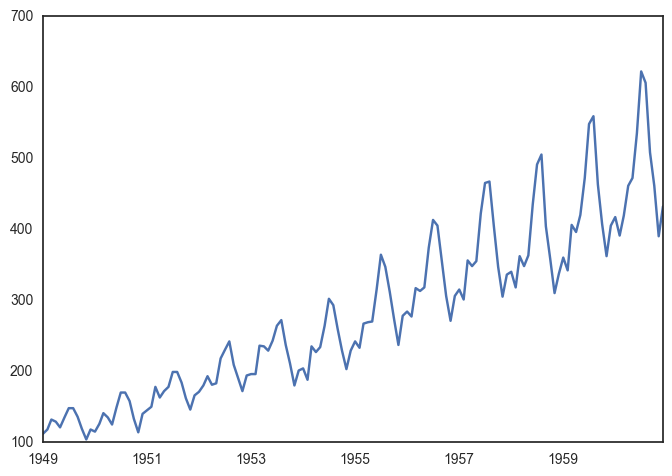

In [6]:
pyplt.plot(ts);

After plotting the data, I can see a general upward trend, as well as seasonal trends.

In [7]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    """
    Generate rolling statistic plot 
    
    Attributes
    ----------
    timeseries: pandas series
    """
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    pyplt.legend(loc='best')
    pyplt.title('Rolling Mean & Standard Deviation')
    pyplt.show(block=False)

def Dickey_Fuller(timeseries):
    """
    Perform Dickey Fuller test for stationarity on the a timeseries
    
    Attributes
    ----------
    timeseries: pandas series
    """
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

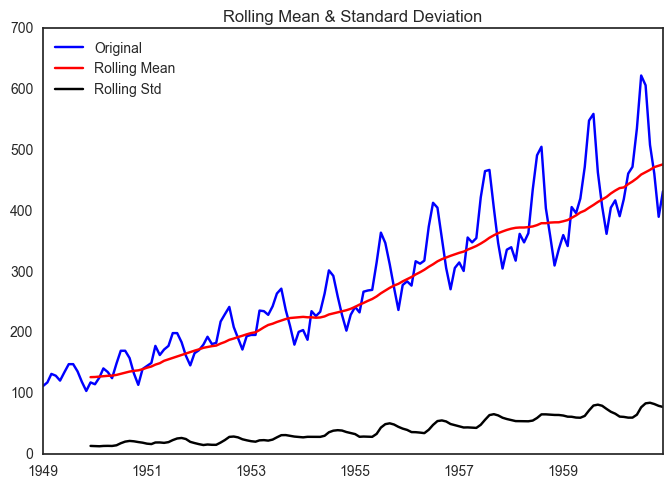

In [8]:
test_stationarity(ts)

In [9]:
Dickey_Fuller(ts)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


This is not a stationary timeseries. The mean isn't constant. Further, the test statistics is way bigger than the critical values.

## NYC Citi Bike Share Timeseries

In [27]:
def load_citibike():
    data_mine = pd.read_csv('data/nyc_citibike.csv')
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one

In [28]:
citibike = load_citibike()

In [29]:
citibike.head()

starttime
2013-07-01 00:00:00     409
2013-07-01 03:00:00     206
2013-07-01 06:00:00    3055
2013-07-01 09:00:00    1395
2013-07-01 12:00:00    1408
Freq: 3H, Name: one, dtype: int64

In [30]:
len(citibike.index)

248

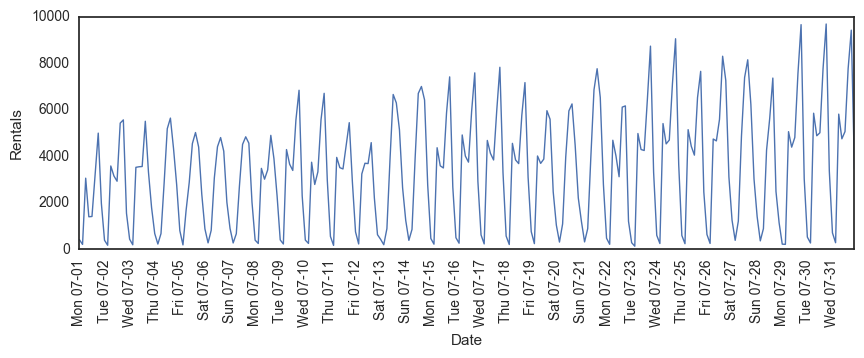

In [31]:
plt.figure(figsize=(10, 3))
x_values = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.plot(citibike, linewidth=1)
plt.xticks(x_values, x_values.strftime("%a %m-%d"), rotation='vertical');
plt.xlabel("Date")
plt.ylabel("Rentals");

In [32]:
y = citibike.values

array([ 409,  206, 3055, 1395, 1408, 3221, 4993, 1963,  386,  171, 3580,
       3150, 2924, 5424, 5562, 1548,  431,  190, 3522, 3546, 3557, 5503,
       3327, 1788,  674,  223,  672, 2848, 5183, 5639, 4322, 2765,  800,
        185, 1671, 2874, 4542, 5018, 4393, 2359,  873,  272,  812, 3067,
       4407, 4802, 4218, 2016,  895,  269,  665, 2720, 4509, 4834, 4560,
       2025,  390,  247, 3477, 3012, 3410, 4897, 3891, 2291,  400,  225,
       4286, 3655, 3388, 5557, 6837, 2293,  392,  250, 3741, 2784, 3326,
       5566, 6705, 2968,  550,  164, 3949, 3507, 3452, 4465, 5443, 2887,
        744,  226, 3237, 3697, 3683, 4584, 2211,  624,  424,  193,  886,
       3890, 6655, 6293, 5135, 2643, 1239,  381,  853, 3928, 6700, 6999,
       6421, 2766,  462,  217, 4365, 3587, 3494, 5857, 7412, 2675,  495,
        258, 4914, 4006, 3745, 5926, 7585, 2913,  616,  228, 4678, 4122,
       3838, 5950, 7825, 3293,  565,  202, 4553, 3840, 3682, 5764, 7166,
       3097,  756,  240, 4009, 3691, 3877, 5958, 55